# Toy (simulated) datasets with ground truth shape plot

To test our package, we simulate a simple dataset with 3 features sampled from Uniform distributions from -5 to 5 i.e. 

$x_0, x_1, x_2 \sim U[-5, 5]$

And the target is simulated as:

$y = x_0^2 + 2 * x_1 + sin(x_2)$

In binary classification, we go through a sigmoid and sample the target:

$\hat{y} = x_0^2 + 2 * x_1 + sin(x_2)$

$y \sim \text{Bern}(sigmoid(\hat{y}))$

We test 4 packages: NodeGAM, Spline, EBM, and XGB.

In [1]:
from nodegam.sklearn import NodeGAMRegressor, NodeGAMClassifier
from nodegam.gams.MySpline import MySplineLogisticGAM, MySplineGAM
from nodegam.gams.MyEBM import MyExplainableBoostingClassifier, MyExplainableBoostingRegressor
from nodegam.gams.MyXGB import MyXGBOnehotClassifier, MyXGBOnehotRegressor
from nodegam.gams.MyBagging import MyBaggingClassifier, MyBaggingRegressor
from nodegam.utils import sigmoid_np
from nodegam.vis_utils import vis_GAM_effects

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## NodeGAMClassifier

In [2]:
# Generate dataset
N = 25000
x1 = np.random.uniform(-5, 5, size=N)
x2 = np.random.uniform(-5, 5, size=N)
x3 = np.random.uniform(-5, 5, size=N)

f1 = lambda x: (x) ** 2 - 8
f2 = lambda x: x * 2
f3 = lambda x: np.sin(x)

y_prob = sigmoid_np(f1(x1) + f2(x2) + f3(x3))
# Sample
y = (np.random.random(N) < y_prob).astype(int)

X = pd.DataFrame(np.vstack([x1, x2, x3]).T)
X.shape, y.shape

((25000, 3), (25000,))

Ground Truth GAM graph

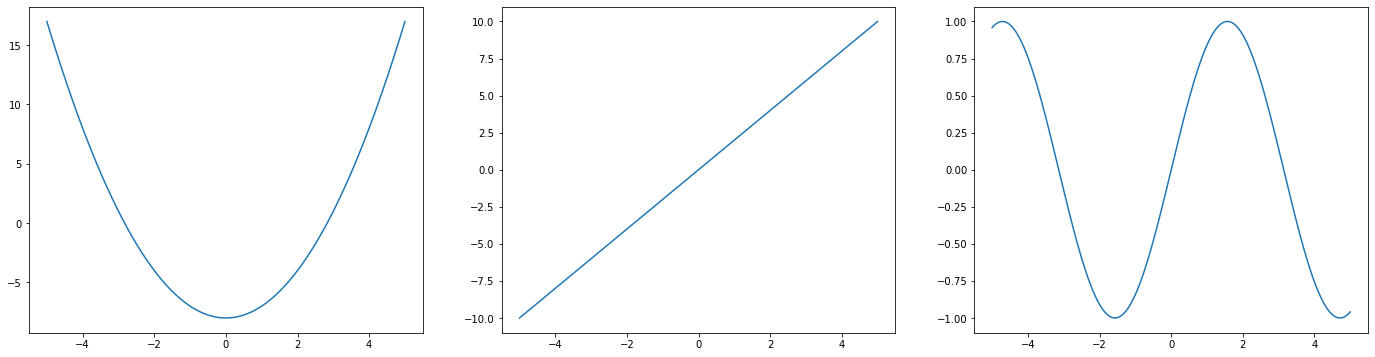

In [3]:
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(x, f1(x))
ax[1].plot(x, f2(x))
ax[2].plot(x, f3(x))

In [4]:
model = NodeGAMClassifier(
    in_features=3,
    objective='logloss',
)

In [5]:
train_losses, val_metrics = model.fit(X, y)

/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/qhoptim/pyt/qhadam.py:133: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370116979/work/torch/csrc/utils/python_arg_parser.cpp:882.)
  exp_avg.mul_(beta1_adj).add_(1.0 - beta1_adj, d_p)


Steps	Train Err	Val Metric (logloss)
100	0.193	0.799592137336731
200	0.1512	0.6132630705833435
300	0.1758	0.502625584602356
400	0.1745	0.2603560984134674
500	0.1634	0.23873233795166016
600	0.1426	0.18793529272079468
700	0.158	0.18058860301971436
800	0.139	0.2069832980632782
900	0.1746	0.1832880675792694
1000	0.1541	0.19611015915870667
LR: 1.00e-02 -> 2.00e-03
1100	0.1607	0.20268769562244415
1200	0.1344	0.211411714553833
1300	0.1322	0.21985094249248505
LR: 2.00e-03 -> 4.00e-04
1400	0.1235	0.22832097113132477
1500	0.1277	0.22959162294864655
1600	0.1561	0.23362019658088684
LR: 4.00e-04 -> 8.00e-05
1700	0.1344	0.2388896644115448
1800	0.1404	0.23862895369529724
1900	0.1417	0.2377251386642456
LR: 8.00e-05 -> 1.60e-05
2000	0.1474	0.23714731633663177
2100	0.1884	0.22427888214588165
2200	0.1482	0.20717400312423706
LR: 1.60e-05 -> 3.20e-06
2300	0.1721	0.19155092537403107
2400	0.1666	0.17896415293216705
2500	0.1533	0.16883589327335358
2600	0.1841	0.1648850291967392
2700	0.1733	0.1634066104888916


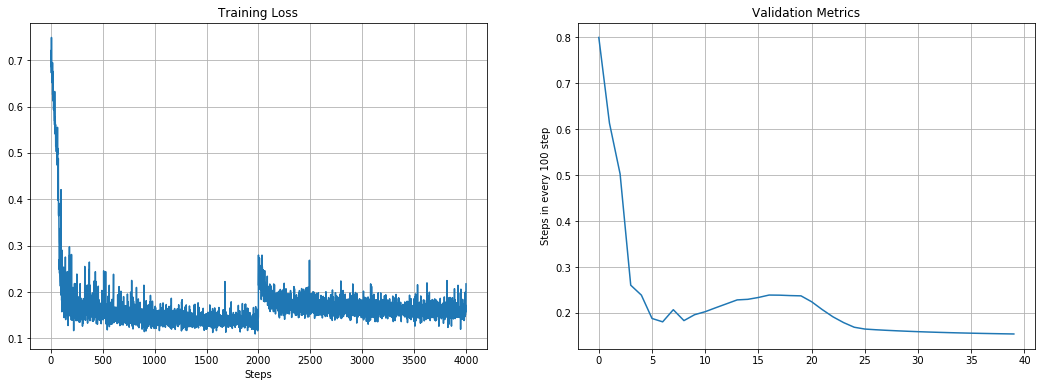

In [6]:
plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Steps')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(val_metrics)
plt.title('Validation Metrics')
plt.xlabel('Steps in every 100 step')
plt.grid()
plt.show()

100%|██████████| 4/4 [00:00<00:00, 10665.74it/s]

bin features 0 with uniq val 24992 to only 256
bin features 1 with uniq val 24993 to only 256
bin features 2 with uniq val 24993 to only 256
Finish "Run values through model" in 75ms
Finish "Extract values" in 13ms
Finish "Purify interactions to main effects" in 0ms
Finish "Center main effects" in 1ms
Finish "Construct table" in 11ms


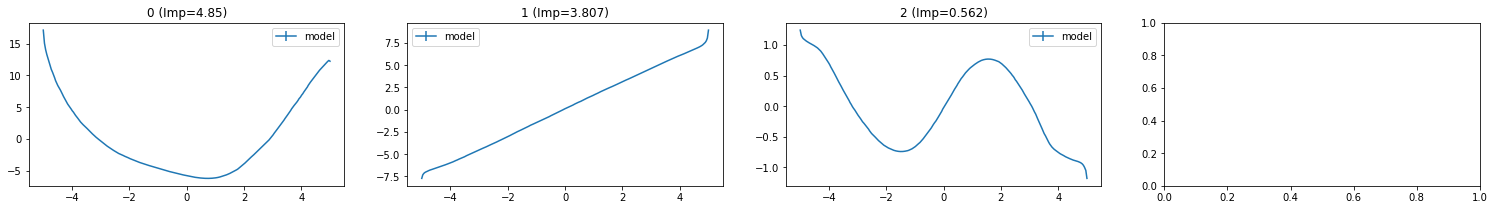

In [7]:
fig, axes, df = model.visualize(X)

Ground Truth

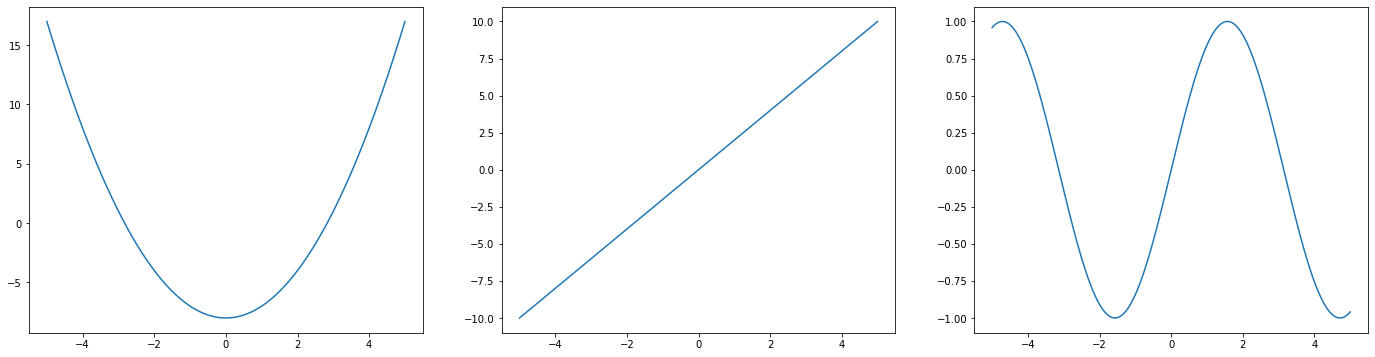

In [8]:
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(x, f1(x))
ax[1].plot(x, f2(x))
ax[2].plot(x, f3(x))

## NodeGAMRegressor

In [9]:
# Generate dataset
N = 25000
x1 = np.random.uniform(-5, 5, size=N)
x2 = np.random.uniform(-5, 5, size=N)
x3 = np.random.uniform(-5, 5, size=N)

f1 = lambda x: (x) ** 2 - 8
f2 = lambda x: x * 2
f3 = lambda x: np.sin(x)

y = f1(x1) + f2(x2) + f3(x3)
X = pd.DataFrame(np.vstack([x1, x2, x3]).T)
X.shape, y.shape

((25000, 3), (25000,))

In [10]:
model = NodeGAMRegressor(
    in_features=3,
)

In [11]:
train_losses, val_metrics = model.fit(X, y)

Normalize y. mean = 0.31971118200964777, std = 9.436361560486022
Steps	Train Err	Val Metric (mse)
100	0.3106	36.97480712283574
200	0.0839	27.178750130946817
300	0.0221	17.671853198852745
400	0.0156	14.974196275821289
500	0.0985	16.199957294507925
600	0.0494	9.092470137971594
700	0.0166	6.078294366965305
800	0.0195	3.9447928657439135
900	0.0113	0.6871479792612096
1000	0.0176	0.6699761318332264
1100	0.0327	0.531289365563486
1200	0.0339	0.4177136651216762
1300	0.0141	0.47946026667486197
1400	0.065	0.5099730727250545
1500	0.0347	0.4543554620274798
LR: 1.00e-02 -> 2.00e-03
1600	0.0219	0.46187406178185475
1700	0.0028	0.25569348999005914
1800	0.0221	0.15916400908374212
1900	0.0103	0.07110312213639133
2000	0.0035	0.04214605100180214
2100	0.0195	0.054172553032664196
2200	0.0142	0.03738822499612974
2300	0.0082	0.027090044627473303
2400	0.005	0.020548492249768735
2500	0.0091	0.023193291623175558
2600	0.0147	0.020368367985109992
2700	0.0117	0.02077906100092235
2800	0.0016	0.018722374627398022
2900

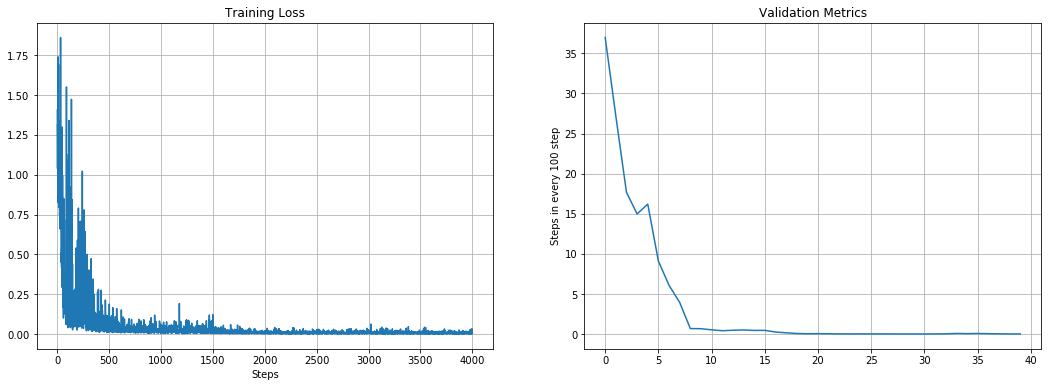

In [12]:
plt.figure(figsize=[18, 6])
plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Steps')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(val_metrics)
plt.title('Validation Metrics')
plt.ylabel('Steps in every 100 step')
plt.grid()
plt.show()

100%|██████████| 4/4 [00:00<00:00, 9857.35it/s]

bin features 0 with uniq val 24996 to only 256
bin features 1 with uniq val 24992 to only 256
bin features 2 with uniq val 24991 to only 256
Finish "Run values through model" in 75ms
Finish "Extract values" in 11ms
Finish "Purify interactions to main effects" in 0ms
Finish "Center main effects" in 1ms
Finish "Construct table" in 5ms


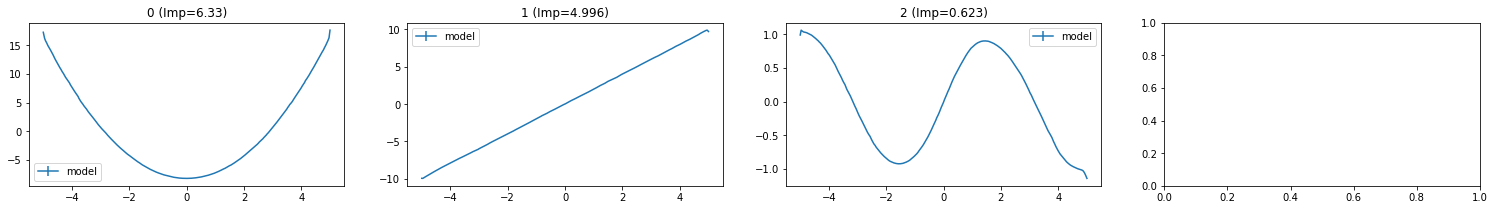

In [13]:
fig, axes, df = model.visualize(X)

Ground Truth

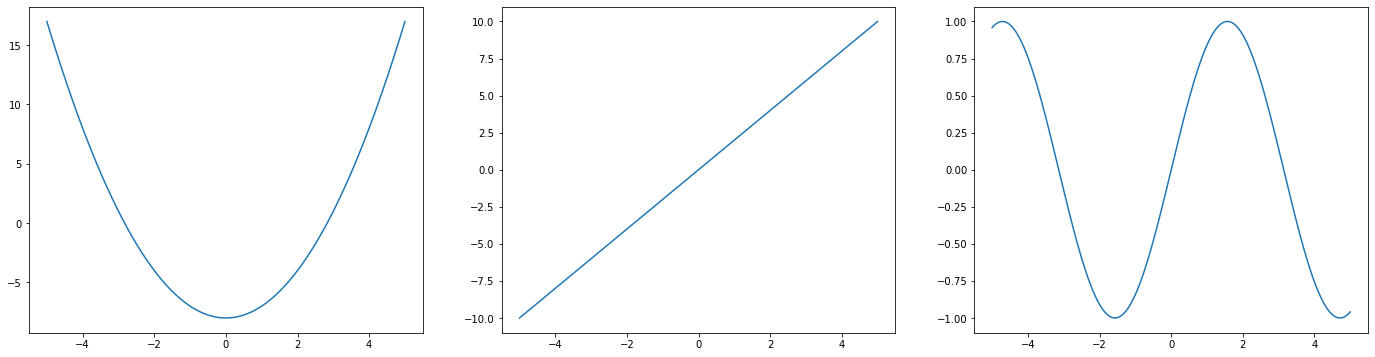

In [14]:
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(x, f1(x))
ax[1].plot(x, f2(x))
ax[2].plot(x, f3(x))

## Baseline Classifiers

In [4]:
# Generate dataset
N = 25000
x1 = np.random.uniform(-5, 5, size=N)
x2 = np.random.uniform(-5, 5, size=N)
x3 = np.random.uniform(-5, 5, size=N)

f1 = lambda x: (x) ** 2 - 8
f2 = lambda x: x * 2
f3 = lambda x: np.sin(x)

y_prob = sigmoid_np(f1(x1) + f2(x2) + f3(x3))
# Sample
y = (np.random.random(N) < y_prob).astype(int)

X = pd.DataFrame(np.vstack([x1, x2, x3]).T, columns=['f0', 'f1', 'f2'])
X.shape, y.shape

((25000, 3), (25000,))

In [5]:
spline = MySplineLogisticGAM()
bagged_spline = MyBaggingClassifier(base_estimator=spline, n_estimators=3)
bagged_spline.fit(X, y)

ebm = MyExplainableBoostingClassifier()
ebm.fit(X, y)

N/A% (0 of 15) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

search range from 0.001000 to 1000.000000


/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
  6% (1 of 15) |#                        | Elapsed Time: 0:00:05 ETA:   0:01:18/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
 13% (2 of 15) |###                      | Elapsed Time: 0:00:07 ETA:   0:00:27/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_

search range from 0.001000 to 1000.000000


/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
  6% (1 of 15) |#                        | Elapsed Time: 0:00:04 ETA:   0:01:03/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
 13% (2 of 15) |###                      | Elapsed Time: 0:00:07 ETA:   0:00:34/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_

search range from 0.001000 to 1000.000000


/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
  6% (1 of 15) |#                        | Elapsed Time: 0:00:04 ETA:   0:01:07/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_divide
  return dist.levels/(mu*(dist.levels - mu))
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/pygam.py:592: RuntimeWarning: invalid value encountered in multiply
  self.distribution.V(mu=mu) *
 13% (2 of 15) |###                      | Elapsed Time: 0:00:07 ETA:   0:00:35/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/pygam/links.py:149: RuntimeWarning: divide by zero encountered in true_

MyExplainableBoostingClassifier(feature_names=['f0', 'f1', 'f2', 'f0 x f1',
                                               'f1 x f2', 'f0 x f2'],
                                feature_types=['continuous', 'continuous',
                                               'continuous', 'interaction',
                                               'interaction', 'interaction'])

In [7]:
xgb_gam = MyXGBOnehotClassifier()
bagged_xgb = MyBaggingClassifier(base_estimator=xgb_gam, n_estimators=3)
bagged_xgb.fit(X, y)

/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/scratch/gobi1/kingsley/envs/cu101/lib/python3.6/site-

MyBaggingClassifier(base_estimator=<nodegam.gams.MyXGB.MyXGBOnehotClassifier object at 0x7f7838540160>,
                    n_estimators=3)

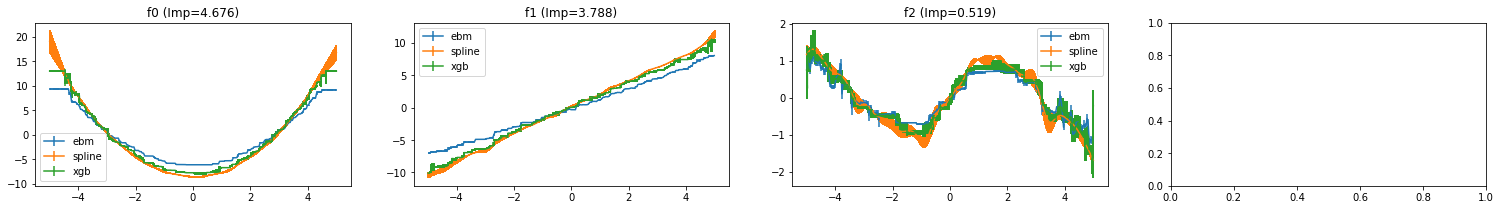

In [8]:
fig, ax = vis_GAM_effects({
    'ebm': ebm.get_GAM_df(),
    'spline': bagged_spline.get_GAM_df(),
    'xgb': bagged_xgb.get_GAM_df(),
})

Ground Truth

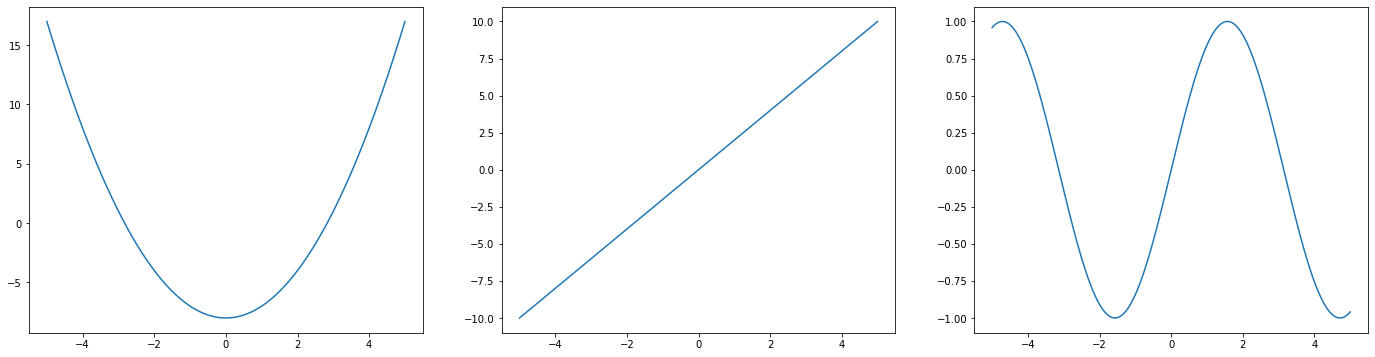

In [9]:
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(x, f1(x))
ax[1].plot(x, f2(x))
ax[2].plot(x, f3(x))

## Baseline Regressors

In [3]:
# Generate dataset
N = 25000
x1 = np.random.uniform(-5, 5, size=N)
x2 = np.random.uniform(-5, 5, size=N)
x3 = np.random.uniform(-5, 5, size=N)

f1 = lambda x: (x) ** 2 - 8
f2 = lambda x: x * 2
f3 = lambda x: np.sin(x)

y = f1(x1) + f2(x2) + f3(x3)
X = pd.DataFrame(np.vstack([x1, x2, x3]).T)
X.shape, y.shape

((25000, 3), (25000,))

In [12]:
# spline = MySplineGAM()
# bagged_spline = MyBaggingRegressor(base_estimator=spline, n_estimators=3)
# bagged_spline.fit(X, y)

ebm = MyExplainableBoostingRegressor()
ebm.fit(X, y)

xgb_gam = MyXGBOnehotRegressor()
bagged_xgb = MyBaggingRegressor(base_estimator=xgb_gam, n_estimators=3)
bagged_xgb.fit(X, y)

MyBaggingRegressor(base_estimator=<nodegam.gams.MyXGB.MyXGBOnehotRegressor object at 0x7f77fd784048>,
                   n_estimators=3)

Somehow Spline Regressor can not work. It produces a wierd error that I can not solve :(

In [5]:
# spline = MySplineGAM()
# bagged_spline = MyBaggingRegressor(base_estimator=spline, n_estimators=3)
# bagged_spline.fit(X, y)

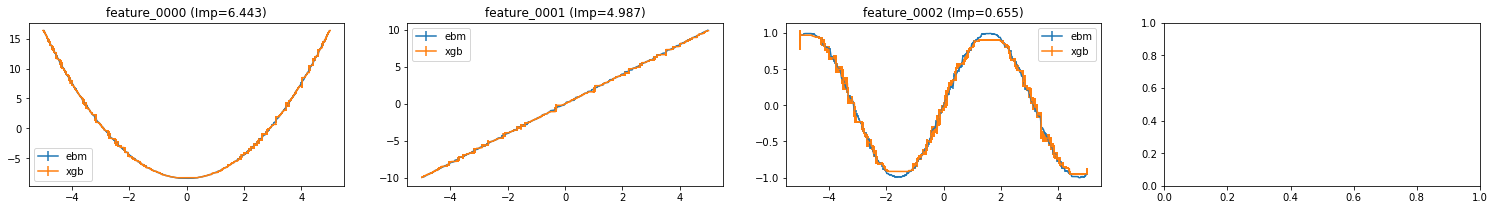

In [13]:
fig, ax = vis_GAM_effects({
    'ebm': ebm.get_GAM_df(),
    'xgb': bagged_xgb.get_GAM_df(),
    # 'spline': bagged_spline.get_GAM_df(),
})

Ground Truth

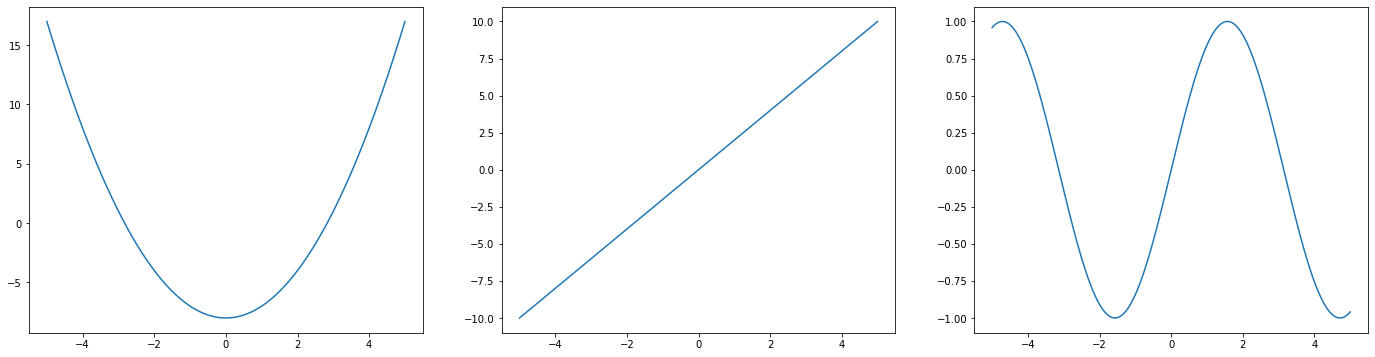

In [14]:
x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].plot(x, f1(x))
ax[1].plot(x, f2(x))
ax[2].plot(x, f3(x))